In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from dnn_play.classifiers.sparse_autoencoder import SparseAutoencoder, sparse_autoencoder_loss, rel_err_gradients
from dnn_play.utils.data_utils import load_mnist
from dnn_play.utils.visualize_utils import display_network

# Plot settings
plt.rcParams['figure.figsize'] = (10.0, 10.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'

In [2]:
# Load MNIST data

(X_train, y_train), (X_val, y_val), (X_test, y_test) = load_mnist(n_train=10000, n_val=1000, n_test=1000)

print("X_train shape = {} y_train shape = {}".format(X_train.shape, y_train.shape))
print("X_val   shape = {} y_val  shape = {}".format(X_val.shape, y_val.shape))
print("X_test  shape = {} y_test shape = {}".format(X_test.shape, y_test.shape))

X_train shape = (10000, 784) y_train shape = (10000,)
X_val   shape = (1000, 784) y_val  shape = (1000,)
X_test  shape = (1000, 784) y_test shape = (1000,)


In [3]:
# Network configuration
input_size  = X_train.shape[1] # Dimension of features
hidden_size = 196
output_size = input_size
layer_units = (input_size, hidden_size, output_size)

# Hyperparameters
reg = 3e-3 # Regulation, weight decay    
beta = 3               # weight of sparsity penalty term       
sparsity_param = 1e-1  # desired average activation of the hidden units 

# Numerical parameters
max_iters = 400

In [4]:
# Define autoencoder

sae = SparseAutoencoder(layer_units)

# Initialize weights
weights = sae.init_weights()
loss, grad = sparse_autoencoder_loss(weights, X_train, reg, beta=beta, sparsity_param=sparsity_param)
print('loss: %f' % loss)


loss: 308.199832


In [5]:
# Gradient checking

if rel_err_gradients() < 1e-8:
    print("Gradient check passed!")
else:
    print("Gradient check failed!") 

Gradient check passed!


In [6]:
"""
Training
"""
weights, loss_history = sae.fit(X_train, reg=reg, beta=beta, sparsity_param=sparsity_param, 
                                max_iters=max_iters, verbose=True)
    

iter:   20, loss: 27.909547
iter:   40, loss: 20.184126
iter:   60, loss: 16.577736
iter:   80, loss: 14.948322
iter:  100, loss: 14.051598
iter:  120, loss: 13.568894
iter:  140, loss: 13.263097
iter:  160, loss: 12.992001
iter:  180, loss: 12.744845
iter:  200, loss: 12.568424
iter:  220, loss: 12.455393
iter:  240, loss: 12.363276
iter:  260, loss: 12.294190
iter:  280, loss: 12.246060
iter:  300, loss: 12.208892
iter:  320, loss: 12.176454
iter:  340, loss: 12.154523
iter:  360, loss: 12.140175
iter:  380, loss: 12.125083
iter:  400, loss: 12.112857


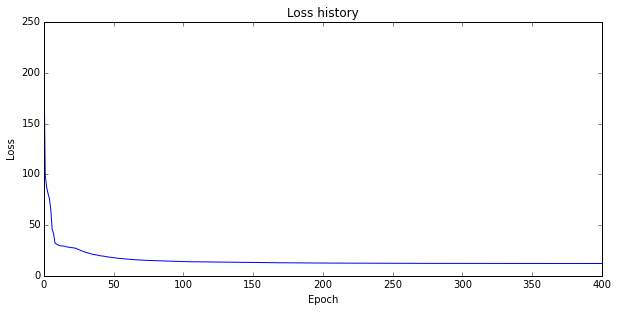

In [7]:
# Plot the loss function and train / validation accuracies
plt.subplot(2, 1, 1)
plt.plot(loss_history)
plt.title('Loss history')
plt.xlabel('Epoch')
plt.ylabel('Loss')

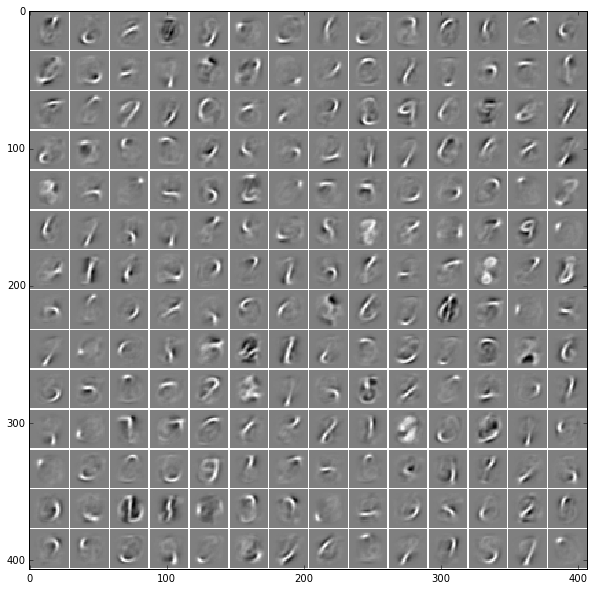

In [8]:
# Visualize the weights 

W0 = weights[0]['W']
image = display_network(W0)
plt.imshow(image, cmap = plt.cm.gray)

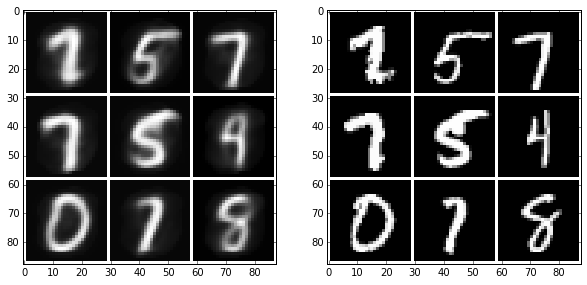

In [9]:
# Visualize the output images from test set
Y_test = sae.predict(X_test)

n_images = 9
mask = [np.random.randint(X_test.shape[1]) for i in range(n_images)]
# Output images
plt.subplot(1, 2, 1)
image = display_network(Y_test[mask, :].T)
plt.imshow(image, cmap = plt.cm.gray)

# Input images
plt.subplot(1, 2, 2)
image = display_network(X_test[mask, :].T)
plt.imshow(image, cmap = plt.cm.gray)
